<a href="https://colab.research.google.com/github/artemis2410/Marketing-Analytics/blob/master/Photonics_project_transmission_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import scipy as scp
from google.colab import files
uploaded = files.upload()

Saving dye_film_transmission.dat to dye_film_transmission.dat


In [4]:
transmission_data=pd.read_csv("dye_film_transmission.dat",sep='	',names=['Wavelength(nm)','Trans'])
print(transmission_data)



     Wavelength(nm)      Trans
0               900  87.946877
1               899  86.997894
2               898  87.342720
3               897  87.158951
4               896  87.635323
..              ...        ...
496             404  90.749268
497             403  90.779900
498             402  90.821396
499             401  90.740685
500             400  90.722672

[501 rows x 2 columns]


In [5]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Transmissivity vs Wavelength')

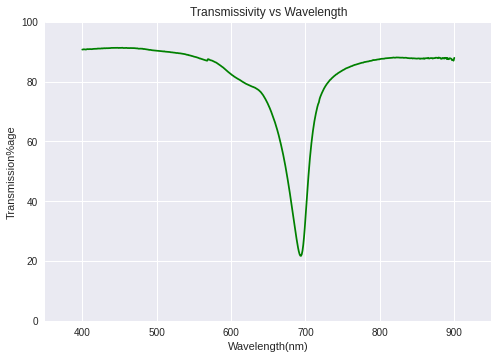

In [6]:
plt.style.use('seaborn')
plt.plot(transmission_data['Wavelength(nm)'],transmission_data['Trans'],c='green')
plt.xlabel('Wavelength(nm)')
plt.ylabel('Transmission%age')
plt.ylim(0,100)
plt.xlim(350,950)
plt.title("Transmissivity vs Wavelength")


In [7]:
transmission_data['transf']=transmission_data['Trans']/100

##Beer Lambert's Law-
$I=I_0e^{-\mu x}$ , where 
$I_0$=Incoming Intensity

$I$=Outgoing Intensity

$\mu$=Absorption Co-efficient


$x$=Distance traversed in the absorbing Medium


Text(0.5, 1.0, 'Absortivity vs Wavelength')

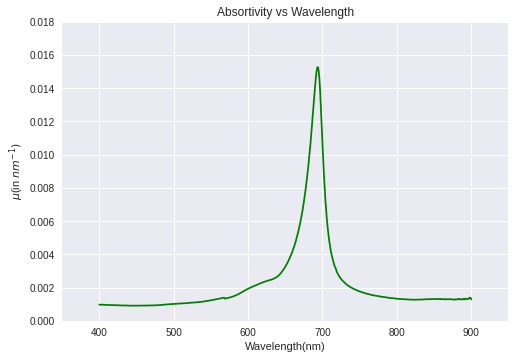

In [8]:
nm=10**(-9)
#Calculation of Absorption Coefficient
transmission_data['absorptivity']=1-transmission_data['transf']
thickness=100*nm
transmission_data['mu']=-np.log(transmission_data['transf'])/100     #100 is thickness(in nm)
plt.plot(transmission_data['Wavelength(nm)'],transmission_data['mu'],c='green')
plt.ylim(0,0.018)
plt.xlim(350,950)
plt.xlabel('Wavelength(nm)')
plt.ylabel('$\mu$(in $nm^{-1})$')
plt.title('Absortivity vs Wavelength')

In [9]:
#The maximum value of absortivity 
mu_max_wave,mu_max=transmission_data.sort_values(by='mu').loc[:,['Wavelength(nm)','mu']].values[-1]
print(mu_max_wave,mu_max)


694.0 0.01527119043643368


$\mu$ theoretically  is given by the formula-

$\frac{Ne^2}{4 m \epsilon_0 c}\frac{\gamma}{\gamma^2+(\omega-\omega_0)^2}$

In the calulation below ,
$\frac{Ne^2}{2 m \epsilon_0 c}\gamma=K$

In [10]:
def lorenz(W,Y):
  K=mu_max/nm
  W0=(2*np.pi/mu_max_wave)*3*10**8/nm
  lorenz=K*Y**2/((Y**2)+(W-W0)**2)
  return lorenz




In [11]:
from scipy.optimize import curve_fit

In [12]:
w=2*np.pi*(3*10**8)/transmission_data['Wavelength(nm)']/nm
absorp=transmission_data['mu']
popt,pcov=curve_fit(lorenz,w,absorp,p0=[0.99*10**15])
popt

array([-7.34598436e+08])

Text(0.5, 1.0, 'Absortivity vs Wavelength')

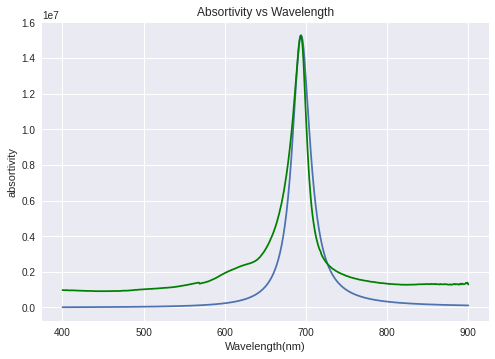

In [13]:
plt.plot(2*np.pi*3*10**8/w/nm,lorenz(w,0.53*10**14))
plt.plot(transmission_data['Wavelength(nm)'],transmission_data['mu']*10**9,c='green')
plt.xlabel('Wavelength(nm)')
plt.ylabel('absortivity')
plt.title('Absortivity vs Wavelength')

in 

In [14]:
file=transmission_data.to_csv('Transmission_data.csv',sep=' ')

In [15]:
#Now we have best fit function with us
print("*"*20)
print("Summary")
print("The resonance position is {} nm".format(mu_max_wave)+"\n")
print("The width is {} Hz  ".format(1.06177*(10**14))+"\n")
print("The amplitude is {} ".format(mu_max)+"\n")
print("*"*20)

********************
Summary
The resonance position is 694.0 nm

The width is 106177000000000.02 Hz  

The amplitude is 0.01527119043643368 

********************


The real part of the dielectric Function-

$n-1=\frac{1}{2}Re[\chi]=\frac{N e^2}{4 \epsilon_0 \omega m_e}\frac{\omega_0-\omega}{(\omega_0-\omega)^2+\gamma^2}$

, where $n$ is  the  real part of the refractive index



In [16]:
def hreal_part(w): 
  #Half of the real part of susceptibility =n-1
  c=3*10**8
  W0=(2*np.pi/mu_max_wave)*3*10**8/nm
  K=mu_max/nm
  Y=0.53*10**14
  hr=K*c*Y*(W0-w)/((W0-w)**2+Y**2)/w/2
  return hr



Text(0.5, 1.0, '$n-1 ~~~~~ \\mu * 10 ^{-7} ~~vs~~ Wavelength(nm)$')

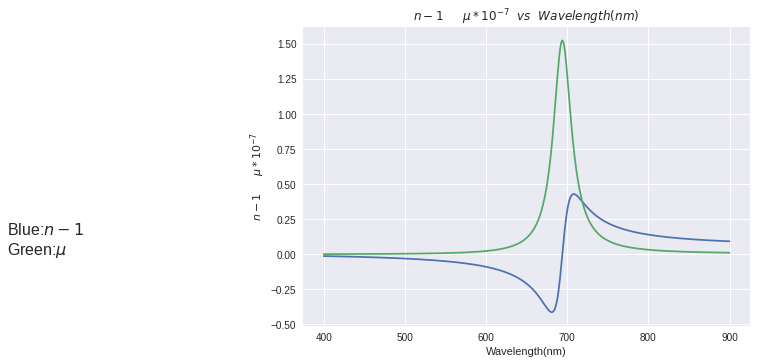

In [17]:
plt.plot(2*np.pi*3*10**8/w/nm,hreal_part(w))
plt.plot(2*np.pi*3*10**8/w/nm,lorenz(w,0.53*10**14)*nm*100)
s="Blue:$n-1$"+"\n"+"Green:$\mu$"
plt.text(10,0,s,fontsize=16)
plt.xlabel("Wavelength(nm)")
plt.ylabel("$n-1 ~~~~~ \mu * 10 ^{-7}$")
plt.title("$n-1 ~~~~~ \mu * 10 ^{-7} ~~vs~~ Wavelength(nm)$")